In [177]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [178]:
from data.dataset import ModelNet40, collate_fn
import os

import numpy as np
from utils import *

from model import *

### Getting the dataset path

In [179]:
modelnet40_path = os.path.join(os.getcwd(), os.path.join('data', 'dataset_path.txt'))

with open(modelnet40_path, 'r') as file:
    modelnet40_path = file.readline()

### Initalizing the training set DataLoader object

In [180]:
SAMPLE_SIZE = 256
TEST = False
SAMPLING_METHOD = 'fps'

In [181]:
train_loader_256 = ModelNet40(dataset_path=modelnet40_path, test=TEST, sample_size=SAMPLE_SIZE, sampling=SAMPLING_METHOD)

### Creating the model

In [182]:
in_features = 3
feature_dim = 128
out_features = 1024
k_size = 128
NUM_CLASSES = 40

In [183]:
model = PointCloudClassifier(in_features, feature_dim, out_features, k_size, NUM_CLASSES)

## Training specifications:

### Optimizer:

In [184]:
from torch.optim import SGD
from torch.optim.lr_scheduler import CosineAnnealingLR

parameters = model.parameters()
learning_rate = 1e-3
momentum = 0.9

optimizer = SGD(parameters, lr=learning_rate, momentum=momentum)

step = len(train_loader_256)
scheduler = CosineAnnealingLR(optimizer, step)

### Loss function:

In [185]:
from torch.nn import CrossEntropyLoss
from torch.nn import NLLLoss

criterion = CrossEntropyLoss()
criterion = NLLLoss()

## Overfitting the model

In [186]:
from train import train
epochs = 15
loss = train(model=model, optimizer=optimizer,
          scheduler=scheduler, train_loader=[train_loader_256[0]],
          criterion=criterion, epochs=epochs, verbose=False)

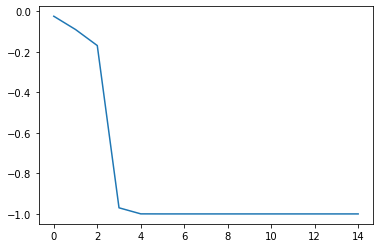

In [187]:
import matplotlib.pyplot as plt
plt.plot(loss)

In [188]:
x_test = model(train_loader_256[0][0].float())
(torch.argmax(x_test) == train_loader_256[0][1]).item()

True

In [189]:
x_test

tensor([1.0000e+00, 5.3686e-19, 1.6859e-19, 5.1463e-19, 4.4758e-19, 2.8069e-19,
        9.6447e-19, 6.2525e-19, 1.3275e-18, 1.7581e-18, 6.2278e-19, 4.6126e-19,
        4.7079e-19, 5.7306e-19, 4.8260e-19, 9.2585e-19, 4.1898e-19, 1.2032e-18,
        7.6376e-19, 9.0208e-19, 1.6990e-19, 1.1246e-18, 2.4128e-19, 7.9381e-19,
        6.4870e-19, 7.1640e-19, 7.9166e-19, 1.0715e-18, 3.8974e-19, 7.5858e-19,
        5.2848e-19, 3.0911e-19, 6.4687e-19, 5.8307e-19, 5.3651e-19, 5.6048e-19,
        1.1769e-18, 1.1258e-18, 1.3308e-18, 3.5123e-19],
       grad_fn=<SoftmaxBackward0>)

## Training the model

In [190]:
model = PointCloudClassifier(in_features, feature_dim, out_features, k_size, NUM_CLASSES)

### DataLoader

In [191]:
SAMPLE_SIZE = 256
TEST = False
SAMPLING_METHOD = 'fps'

model_net_256 = ModelNet40(dataset_path=modelnet40_path, test=TEST, sample_size=SAMPLE_SIZE, sampling=SAMPLING_METHOD)

In [192]:
batch_size = 32

In [193]:
from torch.utils.data import DataLoader

train_loader = DataLoader(model_net_256, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)

### Optimizer:

In [194]:
from torch.optim import SGD
from torch.optim.lr_scheduler import CosineAnnealingLR

parameters = model.parameters()
learning_rate = 1e-4
momentum = 0.9

optimizer = SGD(parameters, lr=learning_rate, momentum=momentum)

step = len(train_loader_256)
scheduler = CosineAnnealingLR(optimizer, step)

### Loss function:

In [195]:
from torch.nn import CrossEntropyLoss
from torch.nn import NLLLoss

criterion = CrossEntropyLoss()
criterion = NLLLoss()

In [ ]:
epochs = 25
loss = train(model=model, optimizer=optimizer,
          scheduler=scheduler, train_loader=train_loader_256,
          criterion=criterion, epochs=epochs, verbose=False)